In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron



In [2]:
def txt2df(path):
    store=[]
    with open(path) as f:
        for line in f.readlines():
            temp={}
            splitword=line.split()
            count=0
            temp['label']=splitword[0]
            for i in range(1,len(splitword)):
                num=splitword[i]
                num=num[2:]
                temp[f'{count}']=num
                count+=1
            store.append(temp)
    f.close()
    df=pd.DataFrame(store)
    df['label']=df['label'].astype(int,errors='raise')
    for i in range(0,8):
        df[f'{i}'] = df[f'{i}'].astype(float, errors = 'raise')
    return df


In [3]:
def splitdata(df):
    bigtrain_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
    train_set, val_set = train_test_split(bigtrain_set, test_size=0.2, random_state=42, stratify=bigtrain_set['label'])
    return train_set,val_set,test_set

In [4]:
def splitlabel(df):
    features = df.iloc[:,1:].values
    label = df.iloc[:,0].values
    return features,label

In [5]:
class Perceptron:
    def __init__(self,features):
        np.random.seed(0)
        self.model=None
        self.mode2=None
        self.w = np.zeros(features.shape[1])
        self.w2=np.random.random_sample(features.shape[1])
        
    def sign(self,input):
        return True if (input>=0) else False
    
    
    def summation(self,features,labels,weight):
        Sum=np.zeros(features.shape[1])
        
        for i in range(features.shape[0]):
            temp = np.dot(labels[i],features[i])
            
            if np.dot(features[i],weight) < 0 and labels[i] == 1:
                Sum=np.add(Sum,np.dot(temp,1))
                
            if np.dot(features[i],weight) >= 0 and labels[i] == -1:
                Sum=np.add(Sum,np.dot(temp,1))

        return Sum
    
    def training(self,features,labels,step,T,act):
        
        for i in range(1,T+1):
            summ =self.summation(features,labels,self.w)
            self.w=self.w+(step*summ)
        self.model = self.w
    
    def randtrain(self,features,labels,step,T,act):
        for i in range(1,T+1):
            summ =self.summation(features,labels,self.w2)
            self.w2=self.w2+(step*summ)
        self.model2=self.w2
            
    def Predict(self,features,act,modelUsed):
        
        ans = np.zeros(features.shape[0])
        
        for i in range(features.shape[0]):
            ans[i] = 1 if act(sum(features[i]*modelUsed)) else -1
        
        return ans
        

In [6]:
def ploting(input,learn,data1,data2,name):
    size=[]
    train=[]
    test=[]
    
    for key in input:
        size.append(key)
        train.append(input.get(key)[1])
        test.append(input.get(key)[0])
    
    plt.plot(size,train,label =data1)
    plt.plot(size,test,label=data2)
    
    plt.title(f'{name} with learning rate={learn}')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [7]:
# text to dataframe, types from object to float or int
store=txt2df("data.txt")

#split data in 60:20:20
train,valid,test = splitdata(store)

#spliting data in labels and features
train_X,train_y=splitlabel(train)
valid_X,valid_y=splitlabel(valid)
test_X,test_y=splitlabel(test)

In [8]:
# confirm successful to convert 
print(f'{train_X.shape} and {train_y.shape},{valid_X.shape} and,{valid_y.shape},{test_X.shape} and {test_y.shape}')

(491, 8) and (491,),(123, 8) and,(123,),(154, 8) and (154,)


In [9]:
store[store['label']==-1]

,label,0,1,2,3,4,5,6,7
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000
6,-1,-0.647059,-0.216080,-0.180328,-0.353535,-0.791962,-0.076006,-0.854825,-0.833333
8,-1,-0.764706,0.979899,0.147541,-0.090909,0.283688,-0.090909,-0.931682,0.066667
...,...,...,...,...,...,...,...,...,...
755,-1,-0.882353,0.286432,0.442623,-0.212121,-0.739953,0.087929,-0.163962,-0.466667
757,-1,-1.000000,0.236181,0.180328,-1.000000,-1.000000,0.081967,-0.846285,0.033333
759,-1,-0.294118,0.909548,0.508197,-1.000000,-1.000000,0.058122,-0.829206,0.500000
761,-1,0.058824,0.708543,0.213115,-0.373737,-1.000000,0.311475,-0.722459,-0.266667


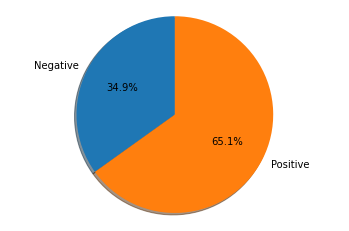

In [10]:
labels = 'Negative','Positive'
sizes = [len(store[store['label']==-1]),len(store[store['label']==1])]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('Proportion of labels in diabetes dataset')
plt.show()


In [11]:
Train=Perceptron(train_X)
Train.training(train_X,train_y,0.1,50,Train.sign)
Train.randtrain(train_X,train_y,0.1,10,Train.sign)
output = Train.Predict(test_X,Train.sign,Train.model)
output2 = Train.Predict(test_X,Train.sign,Train.model2)
print(accuracy_score(test_y, output),accuracy_score(test_y, output2))

0.551948051948052 0.7727272727272727


In [12]:
def experiment(learn,epoch):
    temp={}
    for i in range(1,epoch):
        Train=Perceptron(train_X)
        Train.training(train_X,train_y,learn,i,Train.sign)
        valid_pred = Train.Predict(valid_X,Train.sign,Train.model)
        train_pred=  Train.Predict(train_X,Train.sign,Train.model)
#         print(Train.model)
        #store testing and training scores
        temp[i]=[accuracy_score(valid_y, valid_pred),accuracy_score(train_y, train_pred)]
    ploting(temp,learn,'valid','train','All zero weight')
    return temp

In [13]:
def randomexp(learn,epoch):
    temp={}
    for i in range(1,epoch):
        Train=Perceptron(train_X)
        Train.randtrain(train_X,train_y,learn,i,Train.sign)
        valid_pred = Train.Predict(valid_X,Train.sign,Train.model2)
        train_pred=  Train.Predict(train_X,Train.sign,Train.model2)
        
        #store testing and training scores
        temp[i]=[accuracy_score(valid_y, valid_pred),accuracy_score(train_y, train_pred)]
    ploting(temp,learn,'valid','train','Random weight')
    return temp

In [14]:
def lrchange():
    temp={}
    for i in np.arange(1,0.001,-0.01):
        Train=Perceptron(train_X)
        Train.randtrain(train_X,train_y,i,50,Train.sign)
        valid_pred = Train.Predict(valid_X,Train.sign,Train.model2)
        train_pred=  Train.Predict(train_X,Train.sign,Train.model2)
        temp[i]=[accuracy_score(valid_y, valid_pred),accuracy_score(train_y, train_pred)]
#         print(temp)
    ploting2(temp,np.arange(1,0.001,-0.01),'valid','train','Random weight')
    return temp

In [15]:
def ploting2(input,learn:list,data1,data2,name):
    size=[]
    train=[]
    test=[]
    
    for key in input:
        size.append(key)
        train.append(input.get(key)[1])
        test.append(input.get(key)[0])
    
    plt.plot(size,train,label =data1)
    plt.plot(size,test,label=data2)
    
    plt.title(f'List of learning rate change')
    plt.xlabel("learning rate")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

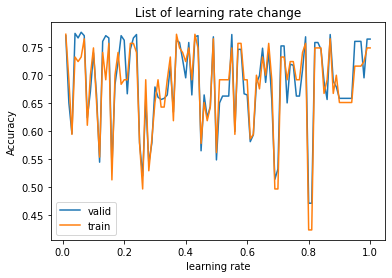

In [16]:
temp=lrchange()

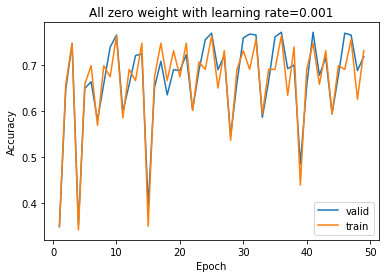

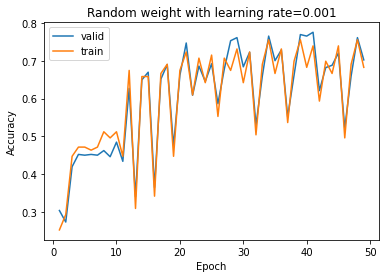

In [17]:
out1=experiment(0.001,50)
radout1=randomexp(0.001,50)

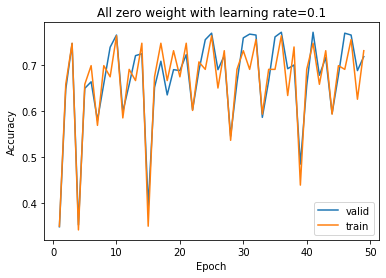

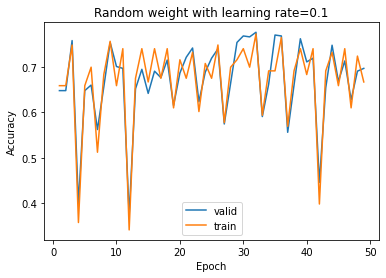

In [18]:
out2=experiment(0.1,50)
radout2=randomexp(0.1,50)

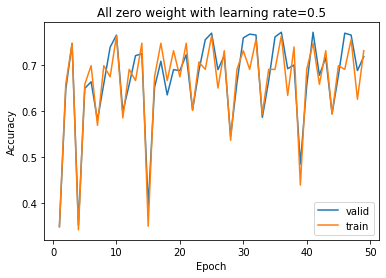

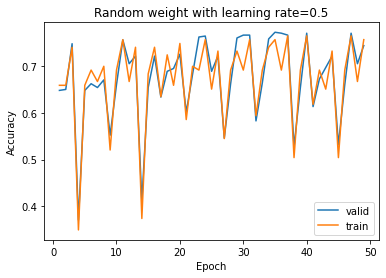

In [19]:
out3=experiment(0.5,50)
radout3=randomexp(0.5,50)

In [20]:
class PerceptronWithBias:
    def __init__(self,features):
        np.random.seed(0)
        self.model=None
        self.mode2=None
        self.w = np.zeros(features.shape[1])
        self.w2=np.random.random_sample(features.shape[1])
        self.w = np.append(1, self.w)
        self.w2= np.append(1, self.w2)
        
    def sign(self,input):
        return True if (input>=0) else False
    
    
    def summation(self,features,labels,weight):
        Sum=np.zeros(features.shape[1])
        Sum[0]=1
        for i in range(features.shape[0]):
            temp = np.dot(labels[i],features[i])
            if np.dot(features[i],weight) < 0 and labels[i] == 1:
                Sum=np.add(Sum,np.dot(temp,1))
                
            if np.dot(features[i],weight) >= 0 and labels[i] == -1:
                Sum=np.add(Sum,np.dot(temp,1))

        return Sum
    def append1(self,sets):
        temp =np.ones((sets.shape[0],sets.shape[1]+1))
        for i in range(sets.shape[0]):
            for k in range(sets.shape[1]):
                temp[i][k+1]=sets[i][k]
        return temp
        
    def training(self,features,labels,step,T,act):
        
        newfeat =self.append1(features)
        for i in range(1,T+1):
            summ =self.summation(newfeat,labels,self.w)
            self.w=self.w+(step*summ)
        self.model = self.w
    
    def randtrain(self,features,labels,step,T,act):
        newfeat =self.append1(features)
        for i in range(1,T+1):
            summ =self.summation(newfeat,labels,self.w2)
            self.w2=self.w2+(step*summ)
        self.model2=self.w2
            
    def Predict(self,features,act,modelUsed):
        
        ans = np.zeros(features.shape[0])
        features=self.append1(features)
        for i in range(features.shape[0]):
            ans[i] = 1 if act(sum(features[i]*modelUsed)) else -1
        
        return ans

In [27]:
def randombias(learn,epoch):
    temp={}
    for i in range(1,epoch):
        Train=PerceptronWithBias(train_X)
        Train.randtrain(train_X,train_y,learn,i,Train.sign)
        valid_pred = Train.Predict(valid_X,Train.sign,Train.model2)
        train_pred=  Train.Predict(train_X,Train.sign,Train.model2)
        #store testing and training scores
        temp[i]=[accuracy_score(valid_y, valid_pred),accuracy_score(train_y, train_pred)]
    ploting(temp,learn,'valid','train','Random weight')
    return temp

In [22]:
bias = PerceptronWithBias(train_X)
bias.training(train_X,train_y,0.01,60,bias.sign)
output = bias.Predict(test_X,Train.sign,bias.model)
accuracy_score(test_y, output)

0.6558441558441559

In [23]:
def Zerobias(learn,epoch):
    temp={}
    for i in range(1,epoch):
        Train=PerceptronWithBias(train_X)
        Train.training(train_X,train_y,0.01,i,bias.sign)
        valid_pred = Train.Predict(valid_X,Train.sign,Train.model)
        train_pred=  Train.Predict(train_X,Train.sign,Train.model)
        temp[i]=[accuracy_score(valid_y, valid_pred),accuracy_score(train_y, train_pred)]
    ploting(temp,learn,'valid','train','All zero weight')
    return temp

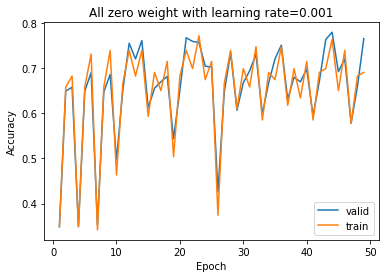

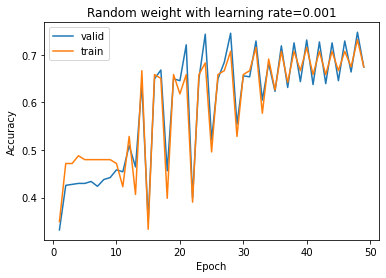

{1: [0.34959349593495936, 0.3319755600814664],
 2: [0.4715447154471545, 0.4256619144602851],
 3: [0.4715447154471545, 0.42769857433808556],
 4: [0.4878048780487805, 0.42973523421588594],
 5: [0.4796747967479675, 0.42973523421588594],
 6: [0.4796747967479675, 0.43380855397148677],
 7: [0.4796747967479675, 0.42362525458248473],
 8: [0.4796747967479675, 0.4378818737270876],
 9: [0.4796747967479675, 0.4419551934826884],
 10: [0.4715447154471545, 0.45824847250509165],
 11: [0.42276422764227645, 0.45417515274949083],
 12: [0.5284552845528455, 0.5091649694501018],
 13: [0.4065040650406504, 0.46435845213849286],
 14: [0.6666666666666666, 0.639511201629328],
 15: [0.3333333333333333, 0.35030549898167007],
 16: [0.6585365853658537, 0.6496945010183299],
 17: [0.6504065040650406, 0.6680244399185336],
 18: [0.3983739837398374, 0.45621181262729127],
 19: [0.6585365853658537, 0.6496945010183299],
 20: [0.6178861788617886, 0.6456211812627292],
 21: [0.6585365853658537, 0.7209775967413442],
 22: [0.390

In [28]:
Zerobias(0.001,50)
randombias(0.001,50)

In [25]:
c=np.random.random_sample(8)
print(c)
c=np.append(1, c)

[0.96366276 0.38344152 0.79172504 0.52889492 0.56804456 0.92559664
 0.07103606 0.0871293 ]


In [26]:
c

array([1.        , 0.96366276, 0.38344152, 0.79172504, 0.52889492,
       0.56804456, 0.92559664, 0.07103606, 0.0871293 ])